In [ ]:
# ps curve can reflect the situation of proximal and distal interactions

In [4]:
import numpy as np
import pandas as pd
import bioframe
import cooler
import cooltools
import sys,os
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
plt.style.use('seaborn-poster')

In [5]:
# merge rep1 and rep2
os.system("cooler merge ./merge/merge_7_17.cool  ./LQL220125-7/inter_100000.cool ./LQL220417-17/inter_100000.cool")
os.system("cooler merge ./merge/merge_8_18.cool  ./LQL220125-8/inter_100000.cool ./LQL220417-18/inter_100000.cool")

INFO:cooler.reduce:Merging:
./LQL220125-7/inter_100000.cool
./LQL220417-17/inter_100000.cool
INFO:cooler.create:Creating cooler at "./merge/merge_7_17.cool::/"
INFO:cooler.create:Writing chroms
INFO:cooler.create:Writing bins
INFO:cooler.create:Writing pixels
INFO:cooler.reduce:nnzs: [119550772, 112266628]
INFO:cooler.reduce:current: [10310392, 9681497]
INFO:cooler.reduce:current: [20641279, 19350173]
INFO:cooler.reduce:current: [30971543, 29006801]
INFO:cooler.reduce:current: [41290187, 38682899]
INFO:cooler.reduce:current: [51593685, 48360940]
INFO:cooler.reduce:current: [61952922, 57993395]
INFO:cooler.reduce:current: [72279617, 67663632]
INFO:cooler.reduce:current: [82606669, 77331787]
INFO:cooler.reduce:current: [92920601, 87011242]
INFO:cooler.reduce:current: [103209010, 96717863]
INFO:cooler.reduce:current: [113483739, 106440340]
INFO:cooler.reduce:current: [119550772, 112266628]
INFO:cooler.create:Writing indexes
INFO:cooler.create:Writing info
INFO:cooler.reduce:Merging:
./LQL

0

In [9]:
# balance matrix
os.system("cooler balance -p 10 ./merge/merge_7_17.cool")
os.system("cooler balance -p 10 ./merge/merge_8_18.cool")

INFO:cooler.cli.balance:Balancing "./merge/merge_7_17.cool"
  return _methods._mean(a, axis=axis, dtype=dtype,

  ret = ret.dtype.type(ret / rcount)

INFO:cooler.balance:variance is 469443382.87941337
INFO:cooler.balance:variance is 189957989.20773995
INFO:cooler.balance:variance is 51481812.19676759
INFO:cooler.balance:variance is 35496388.568116225
INFO:cooler.balance:variance is 12005195.566710608
INFO:cooler.balance:variance is 7783389.776151263
INFO:cooler.balance:variance is 3152949.013249718
INFO:cooler.balance:variance is 1906079.7507057227
INFO:cooler.balance:variance is 868067.5371397532
INFO:cooler.balance:variance is 500065.8029419814
INFO:cooler.balance:variance is 244621.3253512171
INFO:cooler.balance:variance is 136951.05261776692
INFO:cooler.balance:variance is 69925.44935652833
INFO:cooler.balance:variance is 38548.11386499419
INFO:cooler.balance:variance is 20193.250481096493
INFO:cooler.balance:variance is 11047.41698605703
INFO:cooler.balance:variance is 5877.632430

0

In [10]:
# read the matrix
clr_mock_merge=cooler.Cooler('./merge/merge_7_17.cool')
clr_SARS_merge=cooler.Cooler('./merge/merge_8_18.cool')

In [11]:
# genome
T2T = pd.read_csv('T2T-CoV2.GenomeSize.bed', sep='\t')
T2T.chr=bioframe.make_viewframe(T2T)

In [13]:
#get ps curve value
resolution = 100000

cvd_mock_m = cooltools.expected_cis(
    clr=clr_mock_merge,
    view_df=T2T.chr,
    smooth=True,
    aggregate_smoothed=True,
    nproc=4 #CPU
)
cvd_SARS_m = cooltools.expected_cis(
    clr=clr_SARS_merge,
    view_df=T2T.chr,
    smooth=True,
    aggregate_smoothed=True,
    nproc=4 #CPU
)

cvd_mock_m['s_bp'] = cvd_mock_m['dist']* resolution
cvd_SARS_m['s_bp'] = cvd_SARS_m['dist']* resolution

cvd_merged_mock_m = cvd_mock_m.drop_duplicates(subset=['dist'])[['s_bp', 'balanced.avg.smoothed.agg']]
cvd_merged_SARS_m = cvd_SARS_m.drop_duplicates(subset=['dist'])[['s_bp', 'balanced.avg.smoothed.agg']]

lfc=np.log2(cvd_merged_SARS_m['balanced.avg.smoothed.agg']/cvd_merged_mock_m['balanced.avg.smoothed.agg'])

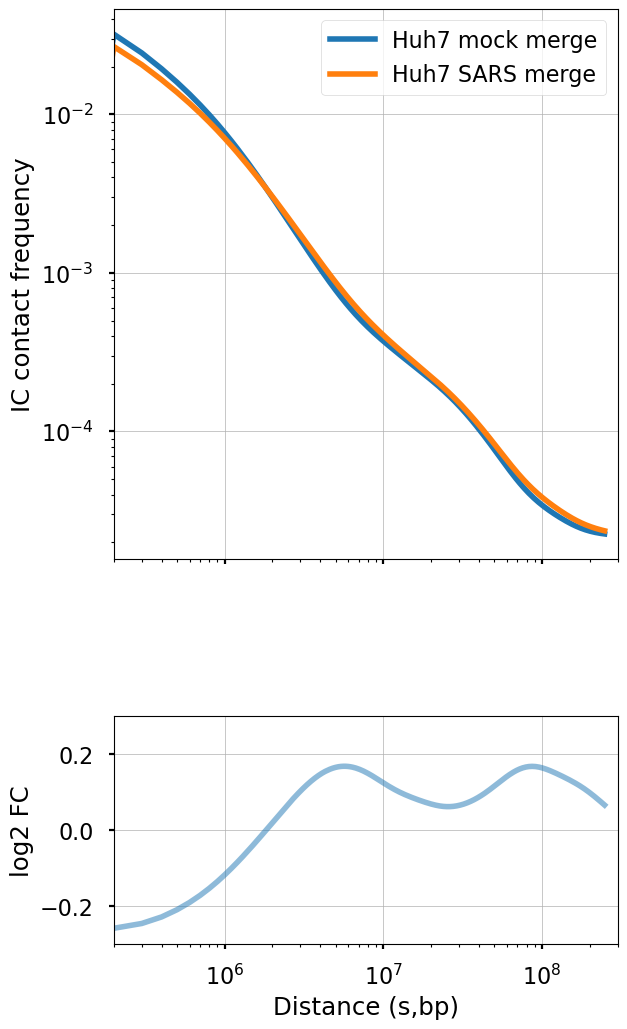

In [14]:
# draw the ps curve
f, axs = plt.subplots(
    figsize=(6.5,13),
    nrows=2,
    gridspec_kw={'height_ratios':[6,2]},
    sharex=True)
ax = axs[0]
ax.loglog(
    cvd_merged_mock_m['s_bp'],
    cvd_merged_mock_m['balanced.avg.smoothed.agg'],
    linewidth=4,
    label='Huh7 mock merge'
)
ax.loglog(
    cvd_merged_SARS_m['s_bp'],
    cvd_merged_SARS_m['balanced.avg.smoothed.agg'],
    linewidth=4,
    label='Huh7 SARS merge'
)

ax.set(
    ylabel='IC contact frequency',
    xlim=(2e5,3e8)
)
ax.set_aspect(1.0)
ax.grid(lw=0.5)
ax.legend()

ax = axs[1]
ax.semilogx(
    cvd_merged_SARS_m['s_bp'],
    lfc,
    linewidth=4,
    alpha=0.5
)
ax.set(
    ylabel='log2 FC',
    xlabel='Distance (s,bp)',
    ylim=(-0.3,0.3)
)

ax.grid(lw=0.5)

plt.savefig("./final_data/figS5B.pdf", format='pdf', dpi=1000, bbox_inches ="tight")
